# Анализ весов модели

In [1]:
import sys
import pickle
import torch
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
if '.' not in sys.path:
    sys.path.append('.')
from src import GCN, create_batch

In [3]:
with open('./data/history.pkl', 'rb') as fp:
    history = pickle.load(fp)

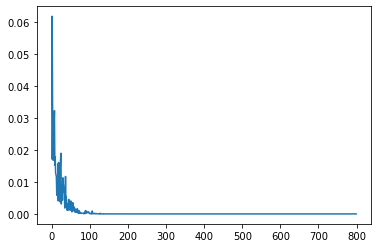

In [4]:
# plt.plot(history)
plt.plot(history[-800:])

In [5]:
mdl = GCN()
mdl.init_2()

In [6]:
n = 50
m0, m1 = 50, 100
batch_size = 8
nodes, adj = create_batch(n, m0, m1, batch_size)
num_edges = torch.sum(torch.sum(adj, dim=-1), dim=-1) / 2
c = mdl(nodes, adj)

In [7]:
num_edges, c

(tensor([87., 84., 81., 70., 86., 94., 93., 64.]),
 tensor([87., 84., 81., 70., 86., 94., 93., 64.], grad_fn=<SumBackward1>))

In [8]:
mdl.load_state_dict(torch.load('./data/mdl.bin'))

<All keys matched successfully>

In [9]:
c = mdl(nodes, adj)
c

tensor([87.0000, 84.0000, 81.0000, 70.0000, 86.0000, 94.0000, 93.0000, 64.0000],
       grad_fn=<SumBackward1>)

In [11]:
st = mdl.state_dict()
st

OrderedDict([('embedding.weight',
              tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
                      [-0.9295, -0.1321,  0.6850,  2.0673, -0.7884, -0.8846, -0.1793, -0.7877]])),
             ('w.weight',
              tensor([[ 0.3914,  0.3837,  0.0358, -0.3418,  0.4395,  0.0263,  0.4480,  0.1862],
                      [-0.4102, -0.1328, -0.2495,  0.0835,  0.0401,  0.0517, -0.1358,  0.1414],
                      [ 0.4788,  0.1111, -0.4162, -0.4512,  0.1444, -0.1673, -0.0381,  0.2731],
                      [-0.2301,  0.0512,  0.0690, -0.1802,  0.3186, -0.1228, -0.1227,  0.2784],
                      [-0.1130, -0.2723, -0.0076,  0.1081, -0.3155, -0.3714,  0.0225,  0.1372],
                      [ 0.0074, -0.1443, -0.4314,  0.0738,  0.3211,  0.3693, -0.1220,  0.4594],
                      [ 0.2163,  0.1711, -0.0831,  0.1756, -0.1443, -0.0191, -0.1121,  0.0108],
                      [ 0.0237, -0.1948,  0.1882, -0.1367, -0.3102, -0.21

In [20]:
h = st['embedding.weight'][1].view(-1, 1)
w = st['w.weight']
theta = st['count.weight']
b = st['count.bias']
b

tensor([0.2488])

In [33]:
wh = w @ h
awh = torch.sigmoid(wh)

print(theta @ awh)
print(theta @ h + b)

tensor([[0.5000]])
tensor([[2.3842e-07]])


tensor([[2.3842e-07]])